# Tensorflow Tutorial 07
参考文献
- [303_save_reload.py](https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/303_save_reload.py)

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

In [0]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) +noise

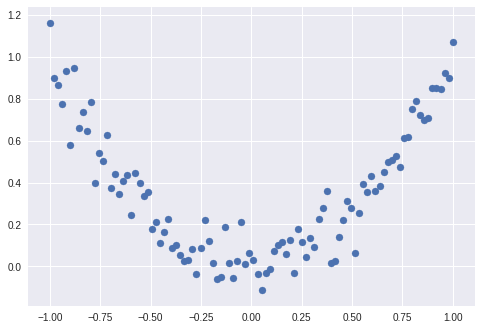

In [4]:
plt.scatter(x,y)
plt.show()

In [0]:
def save():
  print('This is save')
  # build neural network
  tf_x = tf.placeholder(tf.float32, x.shape)
  tf_y = tf.placeholder(tf.float32, y.shape)
  l = tf.layers.dense(tf_x, 10, tf.nn.relu)
  o = tf.layers.dense(l, 1)
  loss = tf.losses.mean_squared_error(tf_y, o)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
  train_op = optimizer.minimize(loss)
  
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())
  
  saver = tf.train.Saver()
  
  for step in range(100):
    sess.run(train_op, {tf_x: x, tf_y: y})
    
  saver.save(sess, './params') # meta_graph is not recommended
  
  # plotting
  pred, l = sess.run([o, loss], {tf_x:x, tf_y:y})
  plt.figure(1, figsize=(10,5))
  plt.subplot(121)
  plt.scatter(x,y)
  plt.plot(x, pred, 'r-', lw=5)
  plt.text(-1, 1.2, 'Save Loss= %.4f'%l, fontdict={'size': 15, 'color': 'red'})
  sess.close()
  

In [0]:
def reload():
  print('This is reload')
  # build entire net again and restore
  tf_x = tf.placeholder(tf.float32, x.shape)  # input x
  tf_y = tf.placeholder(tf.float32, y.shape)  # input y
  l = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
  o = tf.layers.dense(l, 1)                     # output layer
  loss = tf.losses.mean_squared_error(tf_y, o)   # compute cost
  
  sess = tf.Session()
  # don't need to initialize variables, just restoring trained variables
  saver = tf.train.Saver()  # define a saver for saving and restoring
  saver.restore(sess, './params')
  
  # plotting
  pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
  plt.figure(1, figsize=(10,5))
  plt.subplot(122)
  plt.scatter(x, y)
  plt.plot(x, pred, 'r-', lw=5)
  plt.text(-1, 1.2, 'Reload Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
  plt.show()
  sess.close()

This is save


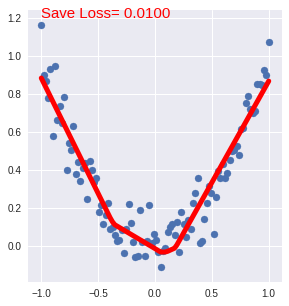

In [74]:
save()

In [0]:
# destroy previous net
tf.reset_default_graph()

This is reload
INFO:tensorflow:Restoring parameters from ./params


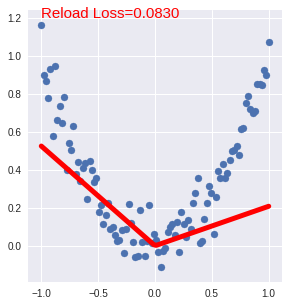

In [77]:
reload()

うまくいかないけどよくわからん